In [11]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
epileptic = pd.read_csv("Epileptic Seizure Recognition.csv", index_col='Unnamed')
epileptic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [13]:
# Select the independent variable and identify the dependent variables
X = epileptic.drop(columns='y')
y = epileptic.y

#Split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8050, 178) (8050,)
(3450, 178) (3450,)


Principal Component Analysis - Visualizing the PCA Transformation 

PCA aligns with axes, rotates data samples to be aligned with axes, shifts data samples so they have a mean of 0, no information is lost 

Dimension reduction 

    * More efficient storage and computation 
    * Remove less-informative "noise" features which cause problems for predictions tasks, e.g. classification, regression 

First step decorrelation - resulting PCA features are not linearly correlated

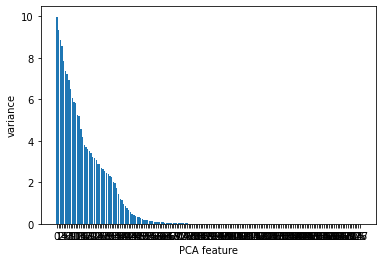

In [15]:
# Rows of transformed correspond to sampels 
# Colunms of transformed are the "PCA features"

# Create Scaler 
scaler = StandardScaler()

# Create PCA instance 
pca = PCA()

# Create pipeline
pipeline = make_pipeline(scaler, pca)

# Fit pipeline to samples 
pipeline.fit(X)

#Plo explained variance 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
CNN/DNN/??

DBSCAN: Density-Based Spatial Clustering of Applications with Noise

Unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

It is comprised of many different methods based on different distance measures. E.g. K-Means (Euclidean distance between points), DBSCAN (distance between nearest points, Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc.

The DBSCAN algorithm uses two parameters:

* minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense. As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the the data set, as minPts >= D + 1. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noiise and will yeild more significant clusters. As a rule of thumb, minPts = 2 * dim can be used, but ut may be necessary to choose larger values for vry loarge data, for noisy data as for data or for data that contains many duplicates 

* eps ( $ \epselon $ ): A distance measure that will be used to locate the points in the neighborhood of any points. The value of $\epselon$ can then be chosen by using a k-distance graph, plotting the distance to the k=minPts-1 nearest neighbor ordered from the largest to the smallst value. Good values of the $\epselon$ are where this plot shows an "elbow": if $\epselon$ is chosen much too small, a large part of the data will not be clustered; whereas for a too high values of $\epselon$, clusters will merge and the majority of objects will be the same cluster. In general, small values of $\epselon$ are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other. 

* Distance function:  The choice of distance function is tightly linked to the choice of $\epselon$, and has a major impact on the outcomes. In general, it will be necessary to the first identify a reasonable measure of similarity for the dataset, before the parameter $\epselon$ can be chosen. there is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set. 
These parameters can be understood if we explore two concepts called density Reachable Density and Density Connectivity.

##Reachability## in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

##Connectivity##, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is the neighborhood of a.

There three types of points after the DBSCAN clustering is complete

In [ ]:
#Determine eps using KNN
def knn_accuracy(X, X_, y, y_):
    
    test_scores = []
    train_scores = []

    for i in range(1,10):

        knn = KNeighborsClassifier(i, n_jobs=-1)
        knn.fit(X,y)
        y_pred = knn.predict(X_)
    
        train_scores.append(knn.score(X,y))
        test_scores.append(knn.score(y_pred, y_))

    train = [round(i, 4) for i in train_scores]
    test = [round(ii, 4) for ii in test_scores]
    
    
#     train_index = train_scores.index(max(train_scores))+1
    best_neighbors = test_scores.index(max(test_scores))+1
    best_index = test_scores.index(max(test_scores))
                           
    plt.figure(figsize=(12,5))
    p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
    p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')
    
    print("Train Accuracy: ", train[best_index])
    print("Best Neighbors: ", best_neighbors)
    print("Test Accuracy: ", test[best_index])

In [ ]:
knn_accuracy(X_train, X_test, y_train, y_test)

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

#Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Homogeneity: %0.3f' % metrics.homogeneity_score(y_train, labels))
print('Completeness: %0.3f' % metrics.v_measure_score(y_train, labels))
print('V-measure: %0.3f' % metrics.v_measure_score(y_train, labels))
print('Adjusted Rand Index: %0.3f' % metrics.adjusted_rand_score(y_train, labels))
print('Adjusted Mutual Information: %0.3f' % metrics.adjusted_mutual_info_score(y_train, labels))
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(X_train, labels))

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()